In [1]:
!pip install ydata_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

In [3]:
pth = "/content/drive/MyDrive/Celerates MSIB/ALL Dataset/"
df = pd.read_csv(pth + 'flight_dataset.csv')
df.shape

(300153, 12)

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.rename(columns={'class':'flight_class'}, inplace=True)
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
flight_class,0
duration,0
days_left,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   flight_class      300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Karna kolom flight seperti semacam ID penerbangan, maka bisa di take out

df.drop(['flight'], axis=1, inplace=True)

In [9]:
# col : airlane
df.airline = df.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'GO_FIRST' : 4,
        'Indigo' : 3,
        'SpiceJet' : 6,
        'AirAsia' : 5,
    }
)

<ipython-input-9-f13996129a1c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.airline = df.airline.replace(


In [10]:
# col : source_city
df.source_city = df.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

<ipython-input-10-1d3f3078e686>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.source_city = df.source_city.replace(


In [11]:
# col :departure_time
df.departure_time = df.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2,
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5,
        'Late_Night' : 6
    }
)

<ipython-input-11-13bce8808d07>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.departure_time = df.departure_time.replace(


In [12]:
#  col : stops
df.stops = df.stops.replace(
    {
        'zero' : 1,
        'one' : 2,
        'two_or_more' : 3
    }
)

<ipython-input-12-d7ea66b53719>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.stops = df.stops.replace(


In [13]:
# col : arrival_time
df.arrival_time = df.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

<ipython-input-13-3f83732feb57>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.arrival_time = df.arrival_time.replace(


In [14]:
# col : destination_city
df.destination_city = df.destination_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

<ipython-input-14-4f0dac5662e5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.destination_city = df.destination_city.replace(


In [15]:
# col : flight_class
df.flight_class = df.flight_class.replace(
    {
        'Economy' : 1,
        'Business' : 2
    }
)

<ipython-input-15-92ebd2fba1fd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.flight_class = df.flight_class.replace(


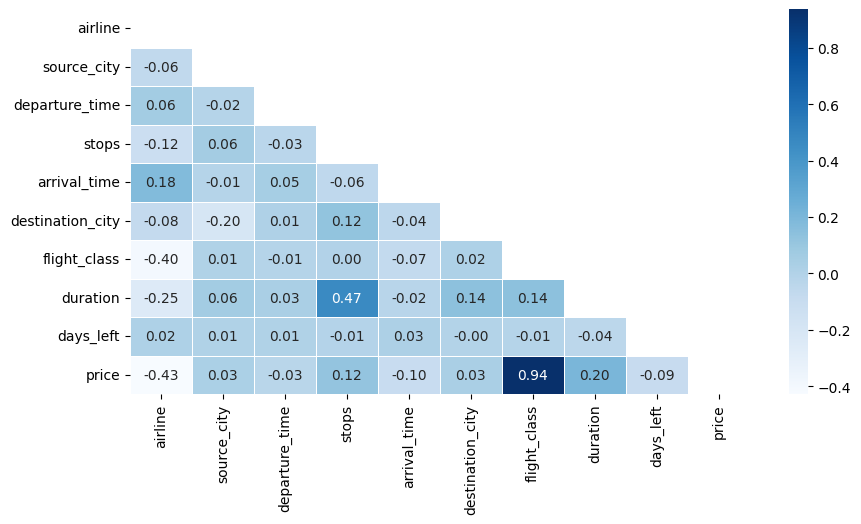

In [16]:
# plot ulang correlation
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [17]:
X = df.drop(columns='price')
y = df.price

In [18]:
scaler = StandardScaler().fit(X)
X_sc = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [19]:
X_sc.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,2.853054,-1.306711,0.146326,-2.321779,-1.064643,-0.757241,-0.672576,-1.397531,-1.843875
1,2.853054,-1.306711,-0.567116,-2.321779,0.355974,-0.757241,-0.672576,-1.375284,-1.843875
2,2.111409,-1.306711,-0.567116,-2.321779,1.776592,-0.757241,-0.672576,-1.397531,-1.843875
3,-0.855170,-1.306711,-1.280557,-2.321779,1.066283,-0.757241,-0.672576,-1.386407,-1.843875
4,-0.855170,-1.306711,-1.280557,-2.321779,0.355974,-0.757241,-0.672576,-1.375284,-1.843875


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [22]:
y_pred = model.predict(X_test)
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')
print(f'R2 : {r2_score(y_test, y_pred)}')

MSE : 8374764.234296898
MAE : 1115.962344772661
R2 : 0.9837535359338055


In [23]:
# Save model
with open('regression_rf', 'wb') as f:
    pickle.dump(model, f)

In [24]:
# Load model
with open('regression_rf', 'rb') as f:
    loaded_model = pickle.load(f)

In [25]:
# Create a new instance X for predict
X_new = [6. ,1. ,3. ,2. ,1. , 1. ,1. ,2.17,1. ]
X_new = np.array(X_new).reshape(1, -1)
X_new = scaler.transform(X_new)
prediction_X_new = loaded_model.predict(X_new)
prediction_X_new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6408.1])